In [3]:
#必要なライブラリをインストール
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [4]:
#1次元の離散型確率変数の定義
#確率質量関数(PMF)
#イカサマサイコロを例に確認
x_set = np.array([1,2,3,4,5,6])

In [5]:
#イカサマサイコロの取り得る値を入れた時に、その確率を返す確率関数を実装
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [6]:
#取りうる値の集合と確率関数のセットが確率関数で、これによって確率変数X振る舞いが決まる
#そのためXはx_setとfを要素に持つリストとして実装する
X = [x_set, f]

In [7]:
#これで確率変数Xが定義できた。
#確率関数から各xkの確率pkを求めてみる。
#ここではxkと確率pkの対応を辞書型にして表示してみる。

#確率p_kを求める
prob = np.array([f(x_k) for x_k in x_set])
#x_kとｐ＿ｋの対応を辞書型にして表示
dict(zip(x_set, prob))

{1: 0.047619047619047616,
 2: 0.09523809523809523,
 3: 0.14285714285714285,
 4: 0.19047619047619047,
 5: 0.23809523809523808,
 6: 0.2857142857142857}

/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 21462 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12426 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 24471 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 12427 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/vagrant/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 20516 missing from current fon

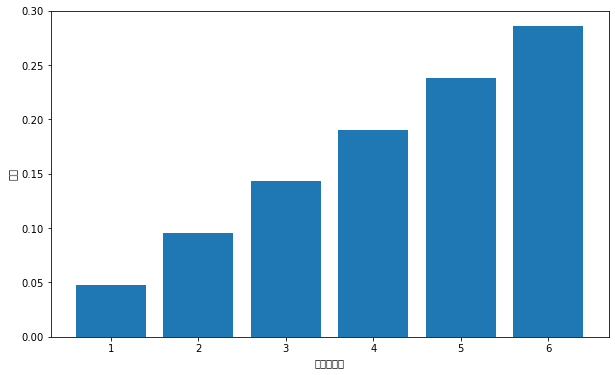

In [8]:
#取り得る値と確率の対応を棒グラフにしてみる。
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.bar(x_set, prob)
ax.set_xlabel('取り得る値')
ax.set_ylabel('確率')

plt.show()

In [9]:
#確率の性質
#確率は絶対に0以上で、すべての確率の和は1にならなければならない
#確率がすべて0以上であるかはnp.all関数(bool判定)を使うことで確認できる
np.all(prob >= 0)

True

In [10]:
#確率の総和が1になっていることも確認
np.sum(prob)

0.9999999999999999

In [11]:
#累積分布関数
#確率関数は確率変数Xがxになるときの確率を返す関数
#確率変数Xがx以下になるときの確率を返す関数F(x)を累積分布関数(CDF:分布関数)という
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])
#分布関数を使うことで、例えば出目が3以下になる確率
F(3)

0.2857142857142857

In [13]:
#確率関数の変換
#確率関数の変換とは、例えば確率変数Xに2を掛けて3を足した2X+3といったものである。
#確率変数を標準化する(平均を引いて標準偏差で割る)ときなどに重要となる操作である。
#変換を行った確率変数もまた確率変数である。

#2X+3を確率変数Yとして、確率分布を求める。
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.047619047619047616,
 7: 0.09523809523809523,
 9: 0.14285714285714285,
 11: 0.19047619047619047,
 13: 0.23809523809523808,
 15: 0.2857142857142857}

In [14]:
#1次元の離散型確率変数の指標
#期待値
#確率変数の平均：確率変数の平均とは確率変数を何回も(無限回)試行して得られた実現値の平均のことである。
#無限回の試行を現実に行うことができないので、離散型確率変数の場合には、確率変数の平均は、確率変数の取り得る値とその確率の積の総和として定義される。
#期待値：確率変数の平均をいう

#イカサマサイコロの期待値を定義通り計算
np.sum([x_k * f(x_k) for x_k in x_set])

4.333333333333333

In [15]:
#確率変数の期待値は無限回試行したときの実現値の平均である。ここでは無限回の試行を100万(=10^6)回サイコロを振ってみる
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.333172

In [16]:
#変換した確率変数の期待値を考える
#この場合、期待値はxkの部分を2ｘｋ＋3に置き換えた式で定義される。=> P87:右下
#これを期待値の関数として実装しておく。

#引数gが確率変数に対する変換の関数になっている。
def E(X, g=lambda x: x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [17]:
#gに何も指定しなければ確率変数Xの期待値を求めることになる
E(X)

4.333333333333333

In [18]:
#確率変数Y=2X+3の期待値は次のように計算できる
E(X, g=lambda x: 2*x + 3)

11.666666666666664

In [19]:
#期待値の線形性の性質を用いて、確率変数Xを変換した確率変数aX+bの期待値を、Xの期待値で求めることができる。
#期待値の線形性：E(aX+b)=aE(X)+b  (a,bは実数　X：確率変数)

#E(2X+3)が2E(X)+3と等しいかを確認
2 * E(X) + 3

11.666666666666666

In [20]:
#確率変数の分散
#離散型確率変数の場合、分散は偏差の二乗の期待値として定義される

#イカサマサイコロの分散
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set])

2.2222222222222223

In [21]:
#変換した確率変数について分散を定義
#確率変数：Y=2X+3 引数gを確率変数に対する変換の関数とする。
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

In [23]:
#gを指定しなければ、確率変数Xの分散を計算する
V(X)

2.2222222222222223

In [24]:
#確率変数Y=2X+3の分散は次のように計算される
V(X, lambda x: 2*x + 3)

8.88888888888889